# STUDY GROUP - M02S23
## Resampling & Monte Carlo Simulation

### Objectives
You will be able to:
* Understand pros and cons of Baye's Theorem
* Understand assumptions that makes NB models "naive"
* Explain different distributions used with NB
* Give examples of NB applications

### Probability Distributions

**Uniform Distribution**

A uniform distribution just means there's a flat constant probability of a value occurring within a given range.
For uniform distribution, the probability function is calculated as:

$$
\rho_{uniform}(x) = \dfrac{1}{b-a} \quad \mbox{ for } a \leq x < b
$$

Mean of uniform distribution is $\dfrac{b+a}{2}$, and the variance is $V = \dfrac{(b-a)^2}{12}$, making the standard deviation $\sigma = \dfrac{b - a}{2 \sqrt{3}}$.

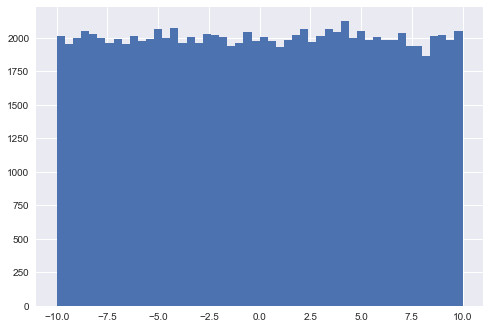

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
values = np.random.uniform(-10.0, 10.0, 100000)
plt.hist(values, 50)

plt.show();

**Gaussian Distribution**
$$
\rho_{Gaussian}(v) = \dfrac{1}{\sqrt{2 \pi \sigma}} e^{-\frac{v^2}{2\sigma^2}}
$$
 
Where Mean of Gaussian distribution is $\mu$, and standard deviation is $\sigma$.


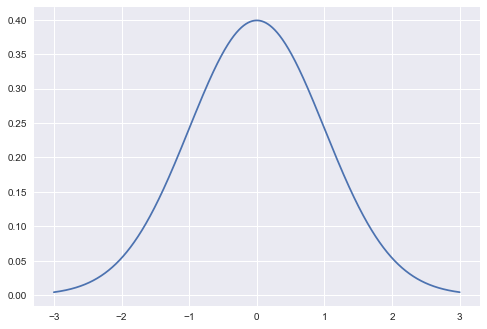

In [3]:
from scipy.stats import norm
import matplotlib.pyplot as plt
x = np.arange(-3, 3, 0.001)
plt.plot(x, norm.pdf(x));

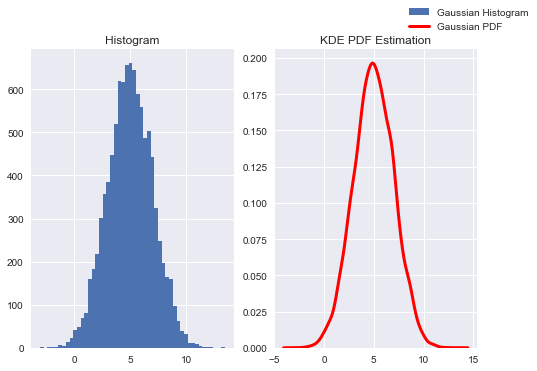

In [27]:
import seaborn as sns
# set distribution parameters and generate values
mu = 5.0
sigma = 2.0
values = np.random.normal(mu, sigma, 10000)
# plot representations
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.hist(values, 50, label='Gaussian Histogram')
ax1.set_title('Histogram')
sns.kdeplot(values, color='red', linewidth=3, label='Gaussian PDF', legend=False, ax=ax2)
ax2.set_title('KDE PDF Estimation')
fig.legend()
plt.show();

**Exponential Distribution**

Another common distribution function is the exponential probability distribution function, where things fall off in an exponential manner, with which we expect to see a curve, where it's very likely for something to happen, near zero, but then, as you get farther away from it, it drops off very quickly. There's a lot of things in nature that behave in this manner. The probability function of an Exponential Distribution is shown as:
$$
\rho_{exponential}(t) = \dfrac{ e^{-\frac{t}{\tau}} }{ \tau } \mbox{ for } t \geq 0
$$

Here mean of the exponential distribution is $\tau$, and the standard deviation $\sigma = \tau$ too. The variance is $\tau^2$.

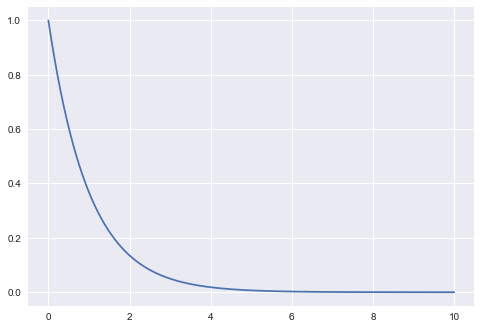

In [25]:
from scipy.stats import expon
import matplotlib.pyplot as plt
x = np.arange(0, 10, 0.001)
plt.plot(x, expon.pdf(x));

**Poisson Distribution** 

Poisson probability mass function, looks a lot like a normal distribution, but it's a little bit different. If we have some information about the average number of things that happen in a given time period, this probability mass function can give you a way to predict the odds of getting another value instead, on a given future day.

$$\rho(X) = \dfrac{\lambda^{x} e^{-\lambda}}{X!}$$


here $\lambda$ is the average number of events, and X is the number of successes.

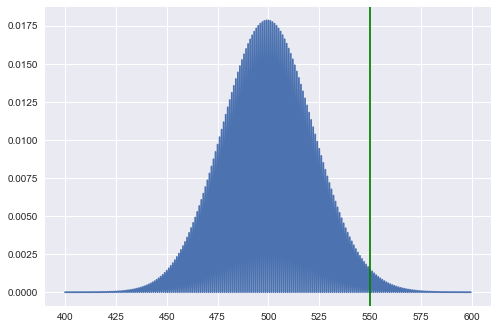

In [26]:
from scipy.stats import poisson
import matplotlib.pyplot as plt
mu = 500
x = np.arange(400, 600, 0.5)
plt.plot(x, poisson.pmf(x, mu))
plt.axvline(550, color= 'g');

### Kolmogorov-Smirnov Test

In applied statistics the question is not whether the data/residuals are perfectly normal, but normal enough for the assumptions to hold. This question is answered through visualization techniques we've seen before like **qqplots, Boxplots**, or more advanced statistica tests including:
* The Shapiro-Wilk test;
* The Anderson-Darling test, and;
* The Kolmogorov-Smirnov test.

In this lesson, we'll ficus on the KS-test which will give you a strong foundation to help you understand and implement other tests when needed. The test statistic in KS test to compare distributions is simply the maximum vertical distance between the two functions. . Essentially, we are testing the sample data against another sample, to compare their distributions for similarities.

An empirical cumulative distribution function (CDF) is a non-parametric estimator of the underlying CDF of a random variable. It assigns a probability of to each datum, orders the data from smallest to largest in value, and calculates the sum of the assigned probabilities up to and including each datum. 

The KS test calculates the similarity between an observed (empirical) distribution and a completely specified theoretical continuous distribution. It is sensitive to all attributes of a distribution including mean, variance and shape. The test statistic $d$ is simply largest deviation between the observed cumulative function and the expected theoretical cumulative frequency distribution, i.e. 

$$
d	   =    	max(abs[F_0(X)-F_r(X)])
$$

**Acceptance Criteria:** If calculated value is less than critical value accept null hypothesis.

**Rejection Criteria:** If calculated value is greater than table value reject null hypothesis.

The KS can be done for 1 sample compared to a theoretical distribution or for 2 samples compared to each other to see if they are from similar distributions. 

### Data Generation

Practice datasets reflect simple problems that allowing testing and debugging of the algorithms and test its robustness. They are also used for understanding the behavior of algorithms in response to changes in model parameters as we shall see with some ML algorithms. Following are some of the reasons why such datasets are preferred over real world datasets:
- Quick and Easy generation - save data collection time  and efforts
- Predictable outcomes - have a higher degree of confidence in the result
- Randomization - datasets can be randomized repeatedly to inspect performance in multiple cases
- Simple data types - easier to visualize data and outcomes

**make_blobs()**: This function generates isotropic Gaussian blobs for clustering and classification problems, similar to the ones we earlier saw with Naive Bayes Algorithm. We can control how many blobs to generate and the number of samples to generate, as well as a host of other properties. 

**make_moons()**: This function is used for binary classification problems with two classes and generates moon shaped patterns. This function allows you to create dataset and specify the level of noise in the data. That helps you make the dataset more complex if required to test the robustness of an algorithm.

**make_circles()**: This function further complicates the generated data and creates values in form of concentric circles. It also features a noise parameter , similar to make_moons(). 

**make_regression()**: This function allows you to create datasets which can be used to test regression algorithms for linear regression. Regression can be performed with a number of algorithms ranging from least squares to more advanced deep networks. We can create datasets by setting number of samples, number of input features, level of noise, and much more. 

### Resampling

Resampling techniques are modern statistical techniques that involve taking repeated subsamples from a sample. These procedures tend to be computationally intensive, since they involve computing statistics of a subsample, creating new subsamples and repeating the process thousands or perhaps millions of times. This can allow for additional analysis of the subsamples leading to increased confidence and knowledge of the larger population.

**Bootstrap**: works by taking random samples with replacement

**Jacknife**: works by taking samples by removing one, or more, observations at a time

-  By calculating the point estimate of interest for these synthetic samples, we can better gauge the confidence interval and variability of our original point estimator.

**Permutation**: can be used in lieu of assumed parameter distributions for any statistical test

### Monte Carlo Simulation

Monte Carlo simulations are useful approximations when solving a mathematical problem analytically is impracticle or impossible. Due to the increasing availability and affordability of powerful computational engines (computers), monte carlo simulations have become an increasingly popular tool for conducting statistical testing.

### References

https://stats.stackexchange.com/questions/208517/kolmogorov-smirnov-test-vs-t-test

https://towardsdatascience.com/an-overview-of-monte-carlo-methods-675384eb1694

https://towardsdatascience.com/monte-carlo-analysis-and-simulation-fd26f7cca448

https://towardsdatascience.com/the-house-always-wins-monte-carlo-simulation-eb82787da2a3